In [ ]:
#Koneksi ke google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Masuk kedalam direktori penyimpanan dataset
%cd /gdrive
%cd My Drive
%cd RETINOPATI_DIABETIK

/gdrive
/gdrive/My Drive
/gdrive/My Drive/RETINOPATI_DIABETIK


In [ ]:
#Meng-unzip dataset atau mengekstrak
!unzip RETINOPATI_DIABETIK.zip

Archive:  RETINOPATI_DIABETIK.zip
   creating: RETINOPATI_DIABETIK/
   creating: RETINOPATI_DIABETIK/test/
   creating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/0024cdab0c1e.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/00a8624548a9.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/00b74780d31d.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/00cb6555d108.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/00e4ddff966a.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/0124dffecf29.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/01b3aed3ed4c.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/01c7808d901d.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/0243404e8a00.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/02dda30d3acf.png  
  inflating: RETINOPATI_DIABETIK/test/DIABETIKRETINOPATI/0318598cfd16.png  

In [ ]:
#Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

In [ ]:
#Membuat variabel global
labels = ['DIABETIKRETINOPATI', 'NORMAL']
img_size = 70
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Meload dataset
train = get_training_data('RETINOPATI_DIABETIK/train')
test = get_training_data('RETINOPATI_DIABETIK/test')
val = get_training_data('RETINOPATI_DIABETIK/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


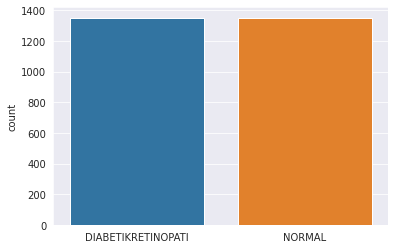

In [ ]:
#Menampilkan jumlah dataset dalam bentuk diagram batang
l = []
for i in train:
    if(i[1] == 0):
        l.append("DIABETIKRETINOPATI")
    else:
        l.append("NORMAL")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

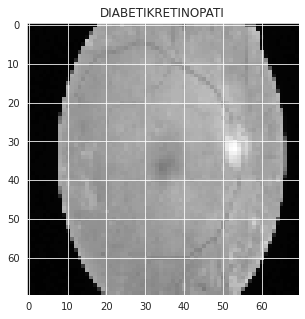

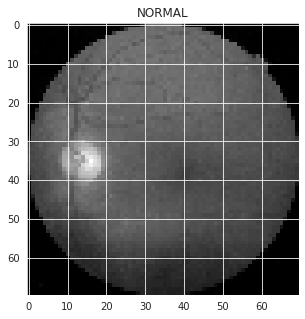

In [ ]:
#Menampilkan sampel data masing-masing kelas
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])


In [ ]:
#Menginisialisasi feature dan label dalam variabel array
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


In [ ]:
#Normalisasi data atau merubah citra RGB menjadi citra biner
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255


In [ ]:
#Me-resize citra (memperkecil data) menjadi 70x70
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)


In [ ]:
# Augmentasi data untuk mencegah overfitting data
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range = 30, 
        zoom_range = 0.2,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_train)


In [ ]:
#Rancangan layer CNN
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (70,70,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         7

In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 20) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/30
136/136 [==============================] - 34s 18ms/step - loss: 0.5851 - accuracy: 0.6661 - val_loss: 0.3557 - val_accuracy: 0.8550
Epoch 2/30
136/136 [==============================] - 2s 14ms/step - loss: 0.3896 - accuracy: 0.8254 - val_loss: 0.2816 - val_accuracy: 0.9000
Epoch 3/30
136/136 [==============================] - 2s 14ms/step - loss: 0.3407 - accuracy: 0.8602 - val_loss: 0.2857 - val_accuracy: 0.9050
Epoch 4/30
136/136 [==============================] - 2s 15ms/step - loss: 0.2954 - accuracy: 0.8817 - val_loss: 0.2592 - val_accuracy: 0.9200
Epoch 5/30
136/136 [==============================] - 2s 15ms/step - loss: 0.2705 - accuracy: 0.8946 - val_loss: 0.2333 - val_accuracy: 0.9200
Epoch 6/30
136/136 [==============================] - 2s 15ms/step - loss: 0.2844 - accuracy: 0.8839 - val_loss: 0.2162 - val_accuracy: 0.9300
Epoch 7/30
136/136 [==============================] - 2s 15ms/step - loss: 0.2578 - accuracy: 0.9046 - val_loss: 0.2170 - val_accuracy: 0.940

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 1s 6ms/step - loss: 0.1708 - accuracy: 0.9401
Loss of the model is -  17.077350616455078 %
85/85 [==============================] - 0s 4ms/step - loss: 0.1708 - accuracy: 0.9401
Accuracy of the model is -  94.00887489318848 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1809 - accuracy: 0.9334
Loss of the model is -  18.087942898273468 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1809 - accuracy: 0.9334
Accuracy of the model is -  93.34319233894348 %


In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 25) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/30
109/109 [==============================] - 2s 17ms/step - loss: 0.1959 - accuracy: 0.9316 - val_loss: 0.1887 - val_accuracy: 0.9200
Epoch 2/30
109/109 [==============================] - 2s 17ms/step - loss: 0.1921 - accuracy: 0.9297 - val_loss: 0.2246 - val_accuracy: 0.9200
Epoch 3/30
109/109 [==============================] - 2s 17ms/step - loss: 0.1897 - accuracy: 0.9316 - val_loss: 0.1772 - val_accuracy: 0.9400
Epoch 4/30
109/109 [==============================] - 2s 18ms/step - loss: 0.1829 - accuracy: 0.9349 - val_loss: 0.1818 - val_accuracy: 0.9300
Epoch 5/30
109/109 [==============================] - 2s 18ms/step - loss: 0.1769 - accuracy: 0.9368 - val_loss: 0.1780 - val_accuracy: 0.9200
Epoch 6/30
109/109 [==============================] - 2s 18ms/step - loss: 0.1866 - accuracy: 0.9323 - val_loss: 0.1963 - val_accuracy: 0.9250
Epoch 7/30
109/109 [==============================] - 2s 18ms/step - loss: 0.1897 - accuracy: 0.9323 - val_loss: 0.1874 - val_accuracy: 0.9250

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 0s 5ms/step - loss: 0.1141 - accuracy: 0.9619
Loss of the model is -  11.407753825187683 %
85/85 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9619
Accuracy of the model is -  96.19082808494568 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1673 - accuracy: 0.9482
Loss of the model is -  16.734053194522858 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1673 - accuracy: 0.9482
Accuracy of the model is -  94.82248425483704 %


In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 30) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/30
91/91 [==============================] - 2s 19ms/step - loss: 0.1439 - accuracy: 0.9538 - val_loss: 0.1644 - val_accuracy: 0.9350
Epoch 2/30
91/91 [==============================] - 2s 20ms/step - loss: 0.1422 - accuracy: 0.9534 - val_loss: 0.1616 - val_accuracy: 0.9450
Epoch 3/30
91/91 [==============================] - 2s 20ms/step - loss: 0.1375 - accuracy: 0.9541 - val_loss: 0.1986 - val_accuracy: 0.9400
Epoch 4/30
91/91 [==============================] - 2s 20ms/step - loss: 0.1386 - accuracy: 0.9530 - val_loss: 0.1581 - val_accuracy: 0.9500
Epoch 5/30
91/91 [==============================] - 2s 20ms/step - loss: 0.1441 - accuracy: 0.9471 - val_loss: 0.1547 - val_accuracy: 0.9500
Epoch 6/30
91/91 [==============================] - 2s 20ms/step - loss: 0.1239 - accuracy: 0.9564 - val_loss: 0.1750 - val_accuracy: 0.9500
Epoch 7/30
91/91 [==============================] - 2s 21ms/step - loss: 0.1414 - accuracy: 0.9508 - val_loss: 0.1840 - val_accuracy: 0.9350
Epoch 8/30
91

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9760
Loss of the model is -  7.40753561258316 %
85/85 [==============================] - 0s 4ms/step - loss: 0.0741 - accuracy: 0.9760
Accuracy of the model is -  97.59615659713745 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9556
Loss of the model is -  16.43804907798767 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1644 - accuracy: 0.9556
Accuracy of the model is -  95.56213021278381 %


In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 40) ,epochs = 25 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/25
68/68 [==============================] - 2s 28ms/step - loss: 0.1078 - accuracy: 0.9645 - val_loss: 0.1346 - val_accuracy: 0.9600
Epoch 2/25
68/68 [==============================] - 2s 25ms/step - loss: 0.1105 - accuracy: 0.9623 - val_loss: 0.1929 - val_accuracy: 0.9450
Epoch 3/25
68/68 [==============================] - 2s 26ms/step - loss: 0.1094 - accuracy: 0.9615 - val_loss: 0.1766 - val_accuracy: 0.9450
Epoch 4/25
68/68 [==============================] - 2s 26ms/step - loss: 0.1050 - accuracy: 0.9619 - val_loss: 0.1702 - val_accuracy: 0.9500
Epoch 5/25
68/68 [==============================] - 2s 26ms/step - loss: 0.1027 - accuracy: 0.9649 - val_loss: 0.1058 - val_accuracy: 0.9650
Epoch 6/25
68/68 [==============================] - 2s 26ms/step - loss: 0.0992 - accuracy: 0.9638 - val_loss: 0.1324 - val_accuracy: 0.9550
Epoch 7/25
68/68 [==============================] - 2s 26ms/step - loss: 0.1075 - accuracy: 0.9597 - val_loss: 0.1390 - val_accuracy: 0.9650
Epoch 8/25
68

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 0s 5ms/step - loss: 0.0635 - accuracy: 0.9760
Loss of the model is -  6.351187825202942 %
85/85 [==============================] - 0s 4ms/step - loss: 0.0635 - accuracy: 0.9760
Accuracy of the model is -  97.59615659713745 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9689
Loss of the model is -  12.196911126375198 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1220 - accuracy: 0.9689
Accuracy of the model is -  96.89348936080933 %


In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 30 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/30
55/55 [==============================] - 2s 30ms/step - loss: 0.0900 - accuracy: 0.9715 - val_loss: 0.1296 - val_accuracy: 0.9450
Epoch 2/30
55/55 [==============================] - 2s 30ms/step - loss: 0.0897 - accuracy: 0.9678 - val_loss: 0.1829 - val_accuracy: 0.9350
Epoch 3/30
55/55 [==============================] - 2s 31ms/step - loss: 0.0850 - accuracy: 0.9719 - val_loss: 0.1693 - val_accuracy: 0.9450
Epoch 4/30
55/55 [==============================] - 2s 32ms/step - loss: 0.0864 - accuracy: 0.9689 - val_loss: 0.1385 - val_accuracy: 0.9500
Epoch 5/30
55/55 [==============================] - 2s 34ms/step - loss: 0.0822 - accuracy: 0.9689 - val_loss: 0.1685 - val_accuracy: 0.9500
Epoch 6/30
55/55 [==============================] - 2s 32ms/step - loss: 0.0843 - accuracy: 0.9752 - val_loss: 0.1786 - val_accuracy: 0.9550
Epoch 7/30
55/55 [==============================] - 2s 33ms/step - loss: 0.0931 - accuracy: 0.9708 - val_loss: 0.1791 - val_accuracy: 0.9500
Epoch 8/30
55

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9811
Loss of the model is -  5.460259318351746 %
85/85 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9811
Accuracy of the model is -  98.1139063835144 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1369 - accuracy: 0.9586
Loss of the model is -  13.68936002254486 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1369 - accuracy: 0.9586
Accuracy of the model is -  95.85798978805542 %


In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 25 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/25
55/55 [==============================] - 2s 33ms/step - loss: 0.0817 - accuracy: 0.9726 - val_loss: 0.2111 - val_accuracy: 0.9450
Epoch 2/25
55/55 [==============================] - 2s 32ms/step - loss: 0.0915 - accuracy: 0.9649 - val_loss: 0.1661 - val_accuracy: 0.9500
Epoch 3/25
55/55 [==============================] - 2s 32ms/step - loss: 0.0791 - accuracy: 0.9734 - val_loss: 0.1937 - val_accuracy: 0.9550
Epoch 4/25
55/55 [==============================] - 2s 32ms/step - loss: 0.0736 - accuracy: 0.9756 - val_loss: 0.1931 - val_accuracy: 0.9450
Epoch 5/25
55/55 [==============================] - 2s 32ms/step - loss: 0.0746 - accuracy: 0.9749 - val_loss: 0.1487 - val_accuracy: 0.9550
Epoch 6/25
55/55 [==============================] - 2s 32ms/step - loss: 0.1225 - accuracy: 0.9564 - val_loss: 0.1354 - val_accuracy: 0.9600
Epoch 7/25
55/55 [==============================] - 2s 32ms/step - loss: 0.0873 - accuracy: 0.9704 - val_loss: 0.1441 - val_accuracy: 0.9700
Epoch 8/25
55

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 0s 5ms/step - loss: 0.0469 - accuracy: 0.9856
Loss of the model is -  4.686064273118973 %
85/85 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 0.9856
Accuracy of the model is -  98.55769276618958 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.9601
Loss of the model is -  18.500617146492004 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1850 - accuracy: 0.9601
Accuracy of the model is -  96.00591659545898 %


In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 35 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/35
55/55 [==============================] - 2s 33ms/step - loss: 0.0677 - accuracy: 0.9756 - val_loss: 0.1683 - val_accuracy: 0.9550
Epoch 2/35
55/55 [==============================] - 2s 32ms/step - loss: 0.0731 - accuracy: 0.9763 - val_loss: 0.1199 - val_accuracy: 0.9600
Epoch 3/35
55/55 [==============================] - 2s 33ms/step - loss: 0.0738 - accuracy: 0.9767 - val_loss: 0.1990 - val_accuracy: 0.9550
Epoch 4/35
55/55 [==============================] - 2s 32ms/step - loss: 0.0863 - accuracy: 0.9697 - val_loss: 0.1757 - val_accuracy: 0.9500
Epoch 5/35
55/55 [==============================] - 2s 33ms/step - loss: 0.0709 - accuracy: 0.9771 - val_loss: 0.1403 - val_accuracy: 0.9650
Epoch 6/35
55/55 [==============================] - 2s 32ms/step - loss: 0.0763 - accuracy: 0.9719 - val_loss: 0.1464 - val_accuracy: 0.9650
Epoch 7/35
55/55 [==============================] - 2s 33ms/step - loss: 0.0741 - accuracy: 0.9749 - val_loss: 0.2203 - val_accuracy: 0.9500
Epoch 8/35
55

In [ ]:
print("Loss of the model is - ", model.evaluate(x_train, y_train)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_train, y_train)[1]*100,"%")

85/85 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.9874
Loss of the model is -  3.556174784898758 %
85/85 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9874
Accuracy of the model is -  98.74260425567627 %


In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0]*100,"%")
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1]*100,"%")

22/22 [==============================] - 0s 5ms/step - loss: 0.1805 - accuracy: 0.9630
Loss of the model is -  18.049579858779907 %
22/22 [==============================] - 0s 5ms/step - loss: 0.1805 - accuracy: 0.9630
Accuracy of the model is -  96.30177617073059 %


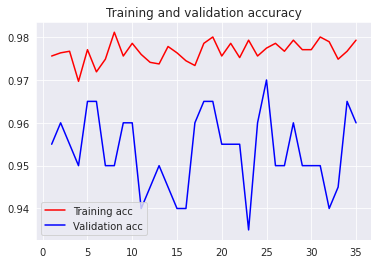

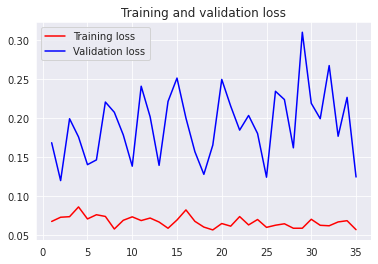

In [ ]:
#Grafik Accuracy dan Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.show()


In [ ]:
#Prediksi berdasarkan data training
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:100]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
print(classification_report(y_test, predictions, target_names = ['DIABETIKRETINOPATI','NORMAL']))

                    precision    recall  f1-score   support

DIABETIKRETINOPATI       0.96      0.97      0.96       338
            NORMAL       0.97      0.96      0.96       338

          accuracy                           0.96       676
         macro avg       0.96      0.96      0.96       676
      weighted avg       0.96      0.96      0.96       676



In [ ]:
#Menampilkan hasil prediksi menggunakan confusion matriks
cm = confusion_matrix(y_test,predictions)
cm


array([[328,  10],
       [ 15, 323]])

In [ ]:
#Menampilkan dalam bentuk diagram
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])


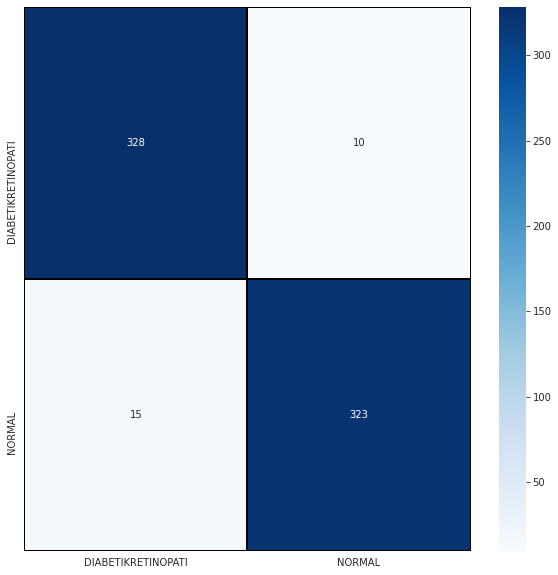

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)


In [ ]:
#Menampilkan prediksi dengan sampel
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]


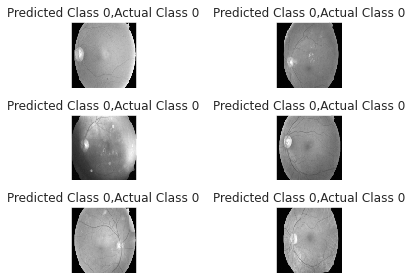

In [ ]:
#Prediksi benar
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(70,70), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1


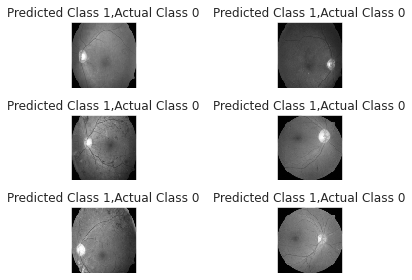

In [ ]:
#Prediksi salah
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(70,70), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1
